In [9]:
import pandas as pd
import yfinance as yf

# Define the Turtle Trading Strategy
def turtle_trading_strategy(df):
    # Define the lookback period
    lookback = 20

    # Calculate the 20-day high and low
    df['20_day_high'] = df['High'].rolling(window=lookback).max()
    df['20_day_low'] = df['Low'].rolling(window=lookback).min()

    # Calculate the long and short signals
    df['long_signal'] = df['Close'] > df['20_day_high']
    df['short_signal'] = df['Close'] < df['20_day_low']

    # Combine the long and short signals into one signal
    df['signal'] = df['long_signal'].apply(lambda x: 1 if x else 0) - df['short_signal'].apply(lambda x: 1 if x else 0)

    # Calculate the daily returns
    df['daily_returns'] = df['Close'].pct_change()

    # Calculate the strategy returns
    df['strategy_returns'] = df['signal'].shift(1) * df['daily_returns']

    # Calculate the cumulative returns
    df['cumulative_returns'] = (1 + df['strategy_returns']).cumprod()

    return df

# def turtle_trading_strategy(df):
#     # Define the lookback period
#     lookback = 20

#     # Calculate the 20-day high and low
#     df['20_day_high'] = df['High'].rolling(window=lookback).max()
#     df['20_day_low'] = df['Low'].rolling(window=lookback).min()

#     # Calculate the long and short signals
#     df['long_signal'] = df['Close'] > df['20_day_high']
#     df['short_signal'] = df['Close'] < df['20_day_low']

#     # Combine the long and short signals into one signal
#     df['signal'] = df['long_signal'].apply(lambda x: 1 if x else 0) - df['short_signal'].apply(lambda x: 1 if x else 0)

#     # Calculate the daily returns and PnL
#     df['daily_returns'] = df['Close'].pct_change()
#     df['pnl'] = df['signal'].shift(1) * df['daily_returns']

#     # Calculate the cumulative PnL and the number of trades
#     df['cumulative_pnl'] = df['pnl'].cumsum()
#     df['num_trades'] = df['signal'].diff().abs().cumsum()

#     # Calculate the average PnL per trade
#     df['avg_pnl_per_trade'] = df['cumulative_pnl'] / df['num_trades']

#     return df

# Define the stock symbol and time period
symbol = 'AAPL'
start_date = '2010-01-01'
end_date = '2021-09-30'

# Download the stock data from Yahoo Finance
df = yf.download(symbol, start_date, end_date)

# Backtest the Turtle Trading Strategy
df = turtle_trading_strategy(df)

# Print the cumulative returns
# print('Cumulative Returns: {:.2f}%'.format((df['cumulative_returns'][-1] - 1) * 100))

[*********************100%***********************]  1 of 1 completed


In [10]:
df

,Open,High,Low,Close,Adj Close,Volume,20_day_high,20_day_low,long_signal,short_signal,signal,daily_returns,strategy_returns,cumulative_returns
Date,,,,,,,,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600,NaN,NaN,False,False,0,NaN,NaN,NaN
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516528,601904800,NaN,NaN,False,False,0,0.001729,0.0,1.0
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412872,552160000,NaN,NaN,False,False,0,-0.015906,-0.0,1.0
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401018,477131200,NaN,NaN,False,False,0,-0.001849,-0.0,1.0
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443575,447610800,NaN,NaN,False,False,0,0.006648,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-23,146.649994,147.080002,145.639999,146.830002,145.547775,64838200,157.259995,141.270004,False,False,0,0.006719,0.0,1.0
2021-09-24,145.660004,147.470001,145.559998,146.919998,145.636993,53477900,157.259995,141.270004,False,False,0,0.000613,0.0,1.0
2021-09-27,145.470001,145.960007,143.820007,145.369995,144.100540,74150700,157.259995,141.270004,False,False,0,-0.010550,-0.0,1.0


In [6]:
import matplotlib.pyplot as plt

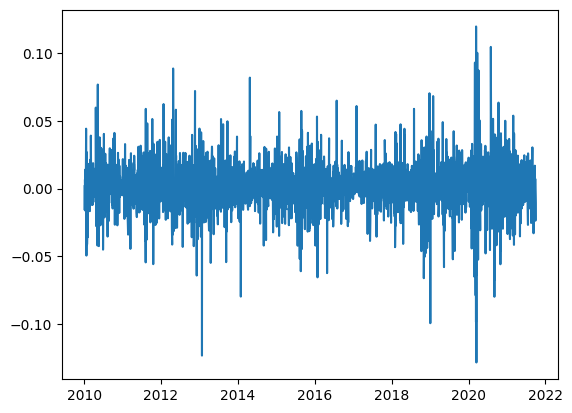

In [13]:
plt.figuref=(45,15)
plt.plot(df['daily_returns'])
plt.show()